# Submission - Machine Learning Pemula - Ivan Surya Hutomo

## hutomoivan@gmail.com

Submission ini berhasil mencapai akurasi hingga 97% dengan memanfaatkan teknik adaptive learning rate dari adadelta untuk mempercepat proses pembelajaran model dan memungkinkan model untuk keluar dari local minima sehingga dapat menuju ke global minima.

Pada submission ini juga ditambahkan visualisasi training menggunakan matplotlib yang belum diajarkan pada modul dengan menyimpang hasil model.fit ke dalam history.

# Hi there, I'm Ivan - aka alexivaner👋

## I'm a Student, Developer, and Learning
- 🔭Name : Ivan Surya Hutomo
- 🌱 Email : hutomoivan@gmail.com
- 🥅 2020 Goals: Contribute more on GitHub Repository
- ⚡ Fun fact: I love to learn a new things and improving myself.

### Connect with me:

[<img align="left" alt="alexivaner | Website" width="22px" src="https://raw.githubusercontent.com/iconic/open-iconic/master/svg/globe.svg" />](https://alexivaner.github.io)

[<img align="left" alt="alexivaner | YouTube" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/youtube.svg" />](https://www.youtube.com/channel/UCUHP9DeewYaRSlcZAHBEgnw)

[<img align="left" alt="alexivaner | LinkedIn" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/linkedin.svg" />](https://www.linkedin.com/in/ivan-surya-hutomo-b5746713a)

[<img align="left" alt="alexivaner | Instagram" width="22px" src="https://cdn.jsdelivr.net/npm/simple-icons@v3/icons/instagram.svg" />](https://www.instagram.com/ivan.hutomo/)


<br />

### Import Library yang Dibutuhkan

In [20]:
#Import Library untuk training

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os
import shutil

from matplotlib import pyplot


## Download RockPaperScissor Dataset 


In [2]:
#Download Dataset Langsung dari Link Rock Paper Scissor Dicoding
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-06 14:00:51--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  31.7MB/s    in 11s     

2020-10-06 14:01:06 (28.7 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



## Extract file zip yang berhasil di download

In [12]:
# melakukan ekstraksi pada file zip
zip_file = '/tmp/rockpaperscissors.zip'
zip_obj = zipfile.ZipFile(zip_file, 'r')
zip_obj.extractall('/tmp')
zip_obj.close()

#Delete rps-cv-images untuk menghindari data yang dobel
shutil.rmtree('/tmp/rockpaperscissors/rps-cv-images')

base_dir = '/tmp/rockpaperscissors'


## Split the Training and Validation dan Augmentasi Data menggunakan ImageDataGenerator

In [197]:
image_generator = ImageDataGenerator(rescale=1/255,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     fill_mode='nearest',
                                     validation_split=0.4)    

train_dataset = image_generator.flow_from_directory(directory=base_dir,
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(directory=base_dir,
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


## Create the Model

In [199]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Conv2D(256, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [200]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_118 (Conv2D)          (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_104 (MaxPoolin (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 24, 24, 128)     

In [201]:
#use learning rate scheduler
initial_learning_rate = 1.0
lr_schedule = tf.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

#Menggunakan optimizer Adadelta dengan learning scheduler
optimizer=tf.optimizers.Adadelta(learning_rate=lr_schedule, rho=0.95, epsilon=1e-08, decay=0.0)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [202]:
#Save training ke dalam history
history=model.fit(
      train_dataset,
      steps_per_epoch=25, 
      epochs=25,
      validation_data=validation_dataset, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  
      verbose=2)

Epoch 1/25
25/25 - 11s - loss: 1.0975 - accuracy: 0.3584 - val_loss: 1.0904 - val_accuracy: 0.4125
Epoch 2/25
25/25 - 11s - loss: 1.0528 - accuracy: 0.4563 - val_loss: 1.0269 - val_accuracy: 0.5250
Epoch 3/25
25/25 - 11s - loss: 1.0853 - accuracy: 0.5263 - val_loss: 1.0117 - val_accuracy: 0.6250
Epoch 4/25
25/25 - 11s - loss: 0.9436 - accuracy: 0.6463 - val_loss: 0.7672 - val_accuracy: 0.7312
Epoch 5/25
25/25 - 11s - loss: 0.6559 - accuracy: 0.7299 - val_loss: 0.5695 - val_accuracy: 0.8062
Epoch 6/25
25/25 - 11s - loss: 0.4976 - accuracy: 0.8013 - val_loss: 0.3474 - val_accuracy: 0.8750
Epoch 7/25
25/25 - 11s - loss: 0.4427 - accuracy: 0.8286 - val_loss: 0.5968 - val_accuracy: 0.7875
Epoch 8/25
25/25 - 11s - loss: 0.4012 - accuracy: 0.8413 - val_loss: 0.4298 - val_accuracy: 0.8125
Epoch 9/25
25/25 - 11s - loss: 0.4741 - accuracy: 0.8039 - val_loss: 0.4020 - val_accuracy: 0.8813
Epoch 10/25
25/25 - 11s - loss: 0.3498 - accuracy: 0.8883 - val_loss: 0.4221 - val_accuracy: 0.8313
Epoch 11/

## Visualisasi Hasil Training

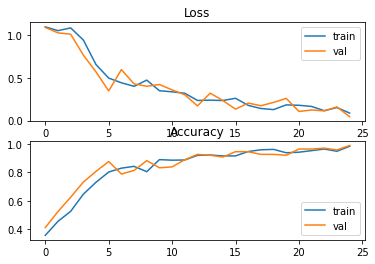

In [203]:

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

## Evaluate the Model

In [204]:
# evaluate the model
_, train_acc = model.evaluate(train_dataset, verbose=0)
_, test_acc = model.evaluate(validation_dataset, verbose=0)

In [205]:
print("Train accuracy is  :",train_acc)
print("Test_accuracy is: ",test_acc)

Train accuracy is  : 0.9756468534469604
Test_accuracy is:  0.9691075682640076


## Predict the Model

Saving IMG_4807.jpg to IMG_4807 (4).jpg
IMG_4807.jpg


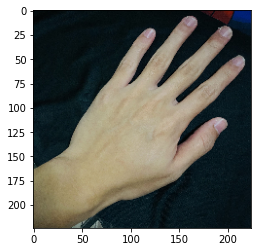

In [207]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x=x/255
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  


In [208]:
labels = (train_dataset.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = labels[np.argmax(classes)]
print("This player is using:",predictions)

This player is using: paper
